In [ ]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch

In [ ]:
# metadata_dir = "/content/drive/MyDrive/11785_Project/Programming/embeddings/singleExperiment/metadata"
metadata_dir = "/content/drive/MyDrive/11785_Project/Programming/embeddings/NathanDistilBERT"
embedding_dir = "/content/drive/MyDrive/11785_Project/Programming/embeddings/NathanDistilBERT/embeddings-variant"

# embedding_files = os.listdir(embedding_dir)
# embedding_files = [f for f in embedding_files if f.endswith('.json')]
# embedding_files = [f for f in embedding_files if not f.startswith('hidden')]
# embedding_files = [f for f in embedding_files if not f.startswith('attention')]

# print(f'Running downstream tasks on the following embedding files:')
# for f in embedding_files:
#     print(f)

In [ ]:
hidden_files = [f for f in os.listdir(metadata_dir) if f.endswith('.json') and f.startswith('hidden')] 
attention_files = [f for f in os.listdir(metadata_dir) if f.endswith('.json') and f.startswith('attention')] 

In [ ]:
hidden_files

['hidden_0.0_distilbert-base-cased_BASELINE_1651441997.json',
 'hidden_0.25_distilbert-base-cased_linear_0.25_1651441997.json',
 'hidden_0.5_distilbert-base-cased_linear_0.5_1651441997.json',
 'hidden_0.75_distilbert-base-cased_linear_0.75_1651441997.json',
 'hidden_1.0_distilbert-base-cased_linear_1.0_1651441997.json',
 'hidden_1.25_distilbert-base-cased_linear_1.25_1651441997.json',
 'hidden_1.5_distilbert-base-cased_linear_1.5_1651441997.json',
 'hidden_1.75_distilbert-base-cased_linear_1.75_1651441997.json',
 'hidden_2.0_distilbert-base-cased_linear_2.0_1651441997.json']

In [ ]:
for hidden_file in hidden_files:
    # Get suffix for naming file
    suffix = ""
    if 'BASELINE' in hidden_file:
        suffix = 'BASELINE'
    else:
        suffix = hidden_file.split('_')[4]

    # Extract hidden states saved in the file
    print('Extracting hidden states for {}'.format(hidden_file))
    hidden_states = torch.load(os.path.join(metadata_dir, hidden_file))
    embeddings1, embeddings2, embeddings3, embeddings4 = {}, {}, {}, {}

    # Generate embeddings
    for sentence, hs in hidden_states.items():
        embeddings1[sentence] = hs[-1][:, 0, :].squeeze() # CLS token embeddings
        # embeddings2[sentence] = hs[-1].mean(dim=1).squeeze() # last hidden state - avg
        embeddings3[sentence] = hs[0].mean(dim=1).squeeze() # first hidden state - avg
        
    torch.save(embeddings1, os.path.join(embedding_dir, 'hidden_cls_{}.json'.format(suffix)))
    # torch.save(embeddings2, os.path.join(embedding_dir, 'hidden_last.json'))
    torch.save(embeddings3, os.path.join(embedding_dir, 'hidden_first_{}.json'.format(suffix)))

    for i in range(1, 8):
        embeddings = {}
        for sentence, hs in hidden_states.items():
            all_avg_hidden = [h.mean(dim=1).squeeze() for h in hs][-i:]
            embedding = torch.stack(all_avg_hidden).flatten()
            embeddings[sentence] = embedding
        torch.save(embeddings, os.path.join(embedding_dir, 'hidden_last_{}_layer_{}.json'.format(i, suffix)))

Extracting hidden states for hidden_0.0_distilbert-base-cased_BASELINE_1651441997.json
Extracting hidden states for hidden_0.25_distilbert-base-cased_linear_0.25_1651441997.json
Extracting hidden states for hidden_0.5_distilbert-base-cased_linear_0.5_1651441997.json
Extracting hidden states for hidden_0.75_distilbert-base-cased_linear_0.75_1651441997.json
Extracting hidden states for hidden_1.0_distilbert-base-cased_linear_1.0_1651441997.json
Extracting hidden states for hidden_1.25_distilbert-base-cased_linear_1.25_1651441997.json
Extracting hidden states for hidden_1.5_distilbert-base-cased_linear_1.5_1651441997.json
Extracting hidden states for hidden_1.75_distilbert-base-cased_linear_1.75_1651441997.json
Extracting hidden states for hidden_2.0_distilbert-base-cased_linear_2.0_1651441997.json


In [ ]:
embedding_dir

'/content/drive/MyDrive/11785_Project/Programming/embeddings/singleExperiment/embeddings-variant/'

In [ ]:
embeddings1, embeddings2 = {}, {}
for sentence, hs in attention_states.items():
    embeddings1[sentence] = hs[-1].mean(dim = (2,3)).flatten() # last attention state
    embeddings2[sentence] = hs[0].mean(dim = (2,3)).flatten() # first attention state
    
torch.save(embeddings1, os.path.join(embedding_dir, 'attention_last.json'))
torch.save(embeddings2, os.path.join(embedding_dir, 'attention_first.json'))

for i in range(1, 7):
    embeddings = {}
    for sentence, hs in attention_states.items():
        all_avg_hidden = [h.mean(dim = (2,3)).flatten() for h in hs][-i:]
        embedding = torch.stack(all_avg_hidden).flatten()
        embeddings[sentence] = embedding
    torch.save(embeddings, os.path.join(embedding_dir, 'attention_last_{}.json'.format(i)))
    print('Saving attention_last_{}.json'.format(i))

Saving attention_last_1.json
Saving attention_last_2.json
Saving attention_last_3.json
Saving attention_last_4.json
Saving attention_last_5.json
Saving attention_last_6.json


In [ ]:
 len(list(attention_states.values())[0]),  len(list(hidden_states.values())[0])

6

In [ ]:
i = 0
for sentence, hs in attention_states.items():
    all_avg_hidden = [h.flatten() for h in hs][-i:]
    print(hs[0]..shape)
    embedding = torch.stack(all_avg_hidden).flatten()
    embeddings[sentence] = embedding
    # print(embedding.shape)
    i += 1
    if i > 10:
      break

torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])
torch.Size([1, 12])


In [ ]:
a = torch.rand((1, 12, 27, 27))
a.mean(dim = (2,3)).shape

torch.Size([1, 12])

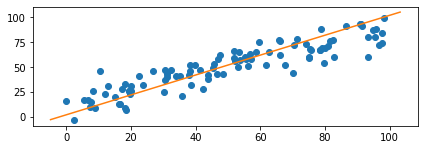

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(x,y, 'o')
plt.tight_layout()
abline(1, 2)